<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Decision_tree_using_Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree:
{'smoothness error=0.009549': 1, 'smoothness error=0.004253': 0, 'smoothness error=0.008738': 1, 'smoothness error=0.007189': 1, 'smoothness error=0.007514': 1, 'smoothness error=0.005607': 0, 'smoothness error=0.007762': 1, 'smoothness error=0.005133': 1, 'smoothness error=0.005518': 1, 'smoothness error=0.005089': 0, 'smoothness error=0.007112': 1, 'smoothness error=0.005467': 0, 'smoothness error=0.006985': 0, 'smoothness error=0.007501': 1, 'smoothness error=0.004394': 1, 'smoothness error=0.005015': 0, 'smoothness error=0.006399': 0, 'smoothness error=0.004625': 0, 'smoothness error=0.003169': 1, 'smoothness error=0.006064': 1, 'smoothness error=0.004291': 1, 'smoothness error=0.006789': 0, 'smoothness error=0.005442': 1, 'smoothness error=0.01604': 1, 'smoothness error=0.005508': 1, 'smoothness error=0.004044': 0, 'smoothness error=0.005158': 1, 'smoothness error=0.006494': {'mean radius=19.81': 0, 'mean radius=12.76': 1}, 'smoothness error=0.005682': 1, 'smoothnes

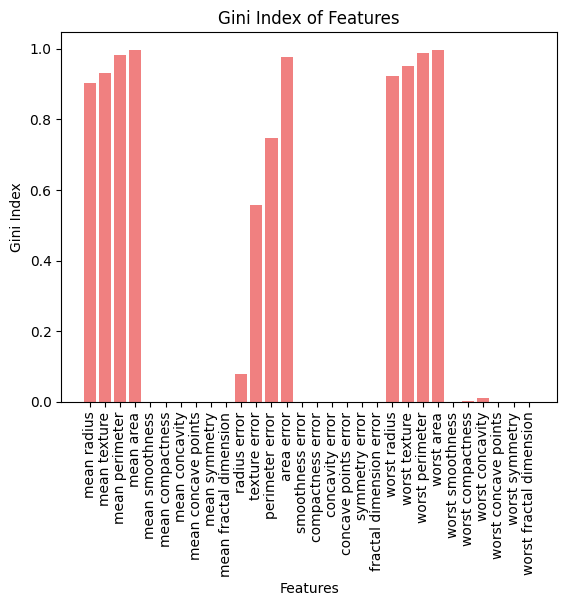

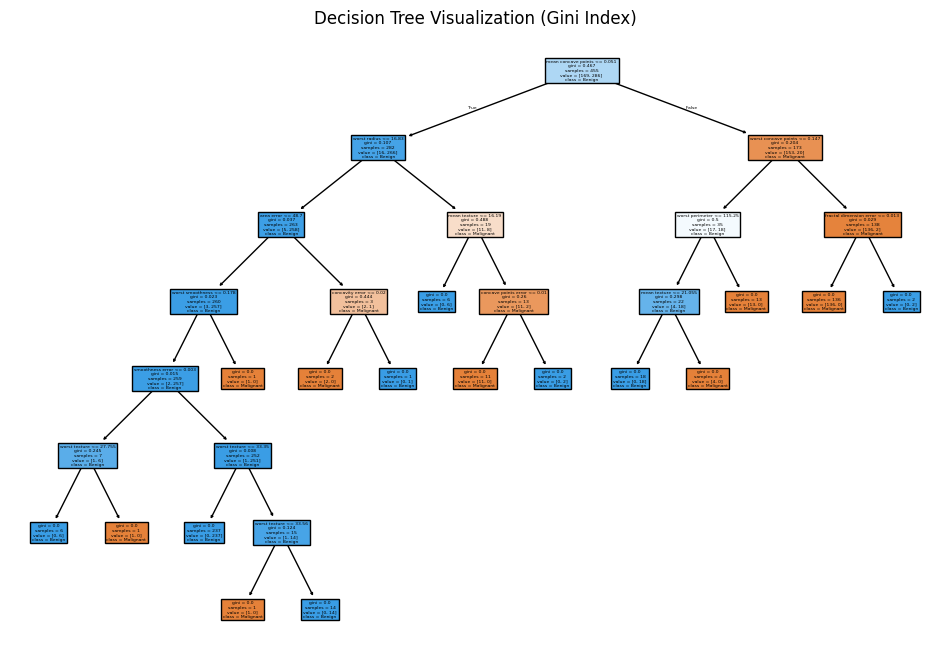

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns=['target'])
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def gini_index(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum([p**2 for p in probabilities if p > 0])

def gini_gain(X_column, y):
    parent_gini = gini_index(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_gini = sum((counts[i] / sum(counts)) * gini_index(y[X_column == v]) for i, v in enumerate(values))
    return parent_gini - weighted_gini

def best_split(X, y):
    best_gain = -1
    best_feature = None
    for col in X.columns:
        gain = gini_gain(X[col], y)
        if gain > best_gain:
            best_gain, best_feature = gain, col
    return best_feature, best_gain

def build_tree(X, y, depth=0, max_depth=3):
    if depth >= max_depth or len(set(y)) == 1:
        return Counter(y).most_common(1)[0][0]

    feature, gain = best_split(X, y)
    if gain == 0:
        return Counter(y).most_common(1)[0][0]

    tree = {}
    values = X[feature].unique()
    for v in values:
        X_subset = X[X[feature] == v]
        y_subset = y[X[feature] == v]
        tree[f'{feature}={v}'] = build_tree(X_subset, y_subset, depth + 1, max_depth)

    return tree

tree = build_tree(X_train, y_train)
print("Decision Tree:")
print(tree)

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))


features = X.columns
gini_values = [gini_index(X[col].astype(int)) for col in features]
plt.bar(features, gini_values, color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Gini Index')
plt.title('Gini Index of Features')
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Malignant', 'Benign'], filled=True)
plt.title('Decision Tree Visualization (Gini Index)')
plt.show()
